# Finding Heavy Traffic Indicators on I-94

We're going to analyze a datset about the westbound traffic on the I-94 Interstate Highway. The goal of the analysis is to determine indicators of heavy traffic such as weather type, time of the day, time of the week, etc. 

The dataset can be found below:
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read in the data set
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

print(traffic.head())
print("\n")
print(traffic.tail())


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

In [2]:
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


Early observations of the data set show that their are 9 columns and 48 204 rows. We have data 6 years worth of data and the columns are split in term of their data type. 

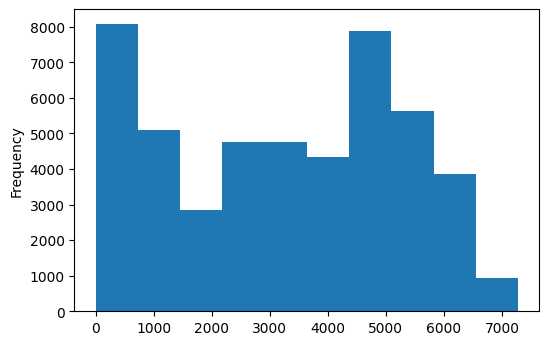

In [3]:
traffic_volume = traffic['traffic_volume'] 
traffic_volume.plot.hist()

In [4]:
traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 and 2018-09-30 the hourly traffic volume had an average of 3259 cars. About 25% of the time, there were only 1,193 cars or fewer passing the station each hour this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more). 

This observation has directed us into analyzing daytime and nighttime data and how that impacts traffic volume.

Let's divide the dataset into two parts 
**Daytime data**: 7am to 7pm
**Nighttime data** 7pm to 7am

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [5]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime.shape)

nightime = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(nightime.shape)

(23877, 9)
(24327, 9)


Lets analyze the data by creating 2 histograms for both day and night

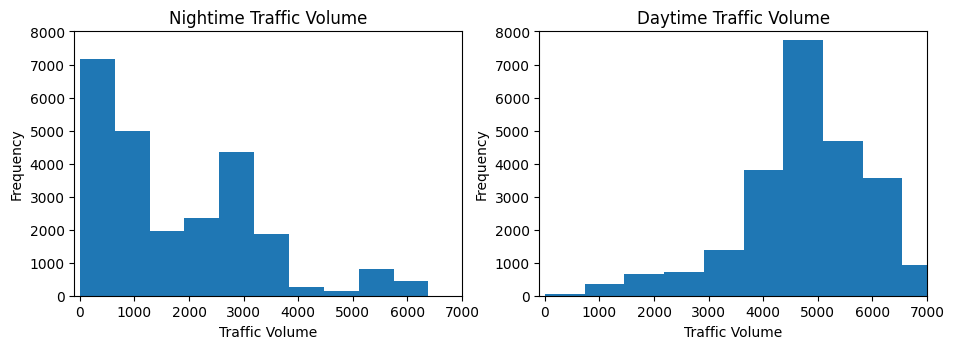

In [6]:
plt.figure(figsize = (11,3.5))
plt.subplot(1, 2, 1)
plt.hist(nightime["traffic_volume"])
plt.xlim(-100, 7000)
plt.ylim(0, 8000)
plt.title("Nightime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(daytime["traffic_volume"])
plt.xlim(-100, 7000)
plt.ylim(0, 8000)
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.show()


Quickly looking at the two graphs we can see that the nightime graph has a negative correlation and the daytime is positive. A positive correlation means that as the frequency increases so does the traffic volume. The nightime traffic volume is right skewed and the traffic volume is not very frequent. Lets look up a few statistics for traffic_volume for both day and night.  

In [7]:
print(nightime["traffic_volume"].describe())
print("\n")
print(daytime["traffic_volume"].describe())


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


The goal of this analysis is to find indicators of heavy traffic. Therfore we want the data with the higher mean as this indicates more heavy traffic. 

It is in our best interest to eliminate the nightime data and continue exploring the daytime data to find more indicators of heavy traffic.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Time of day

In [8]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

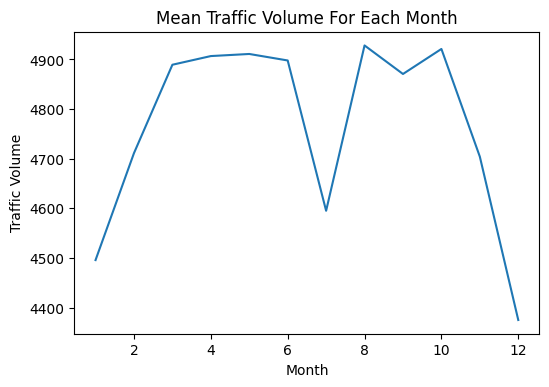

In [9]:
plt.plot(by_month['traffic_volume'])
plt.title("Mean Traffic Volume For Each Month")
plt.xlabel("Month")
plt.ylabel("Traffic Volume")

The line plot shows that the traffic volume increases in the warmer seasons such as the spring, summer, and fall. One exception is the month of July which seems to have a big decrease in traffic volume. This is most likely due to people taking time off to enjoy their summer break.   

In [10]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

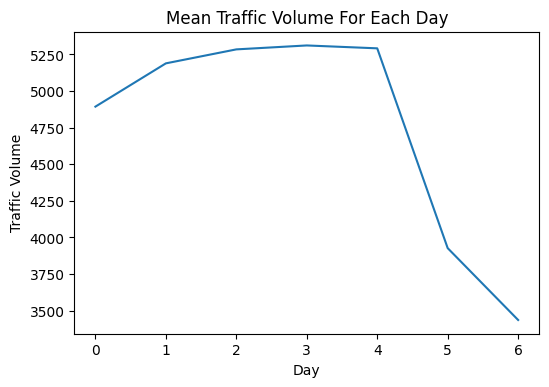

In [11]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Mean Traffic Volume For Each Day")
plt.xlabel("Day")
plt.ylabel("Traffic Volume")

The line plot shows that traffic is close to uniform between Monday and Friday which is most likely due to people working their jobs. Traffic volume decreases a lot on the weekend due to most people not having to work.  

In [12]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])




hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


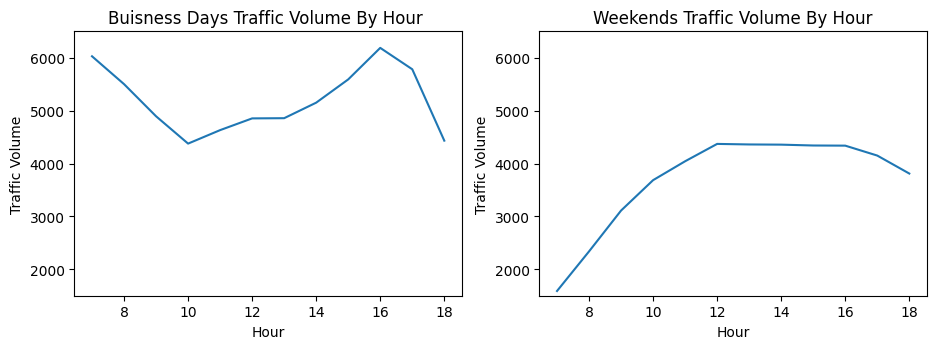

In [13]:
plt.figure(figsize = (11,3.5))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Buisness Days Traffic Volume By Hour ")
plt.ylim(1500, 6500)
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Weekends Traffic Volume By Hour")
plt.ylim(1500, 6500)
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")

plt.show()



The traffic during buisness days seems to have consistent volume throughout the day. There is more traffic seen  at the start of the work day and at the end. This would make sense as everyone is finishing work at the same time. The traffic during weekends is more consitent throughout the day apart from the early morning but doesn't see as much volume as buisness days. 

To Sumarize what we haved learned from this analysis:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

Another possible cause of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description. 

A few of these columns are numerical so let's start by looking up their correlation values with traffic volume

In [14]:
daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Out of the weather columns, temp seems to have the largest correlation value. Therfore let's explore this column and plot a scatter plot for this weather column and traffic volume.

(200.0, 400.0)

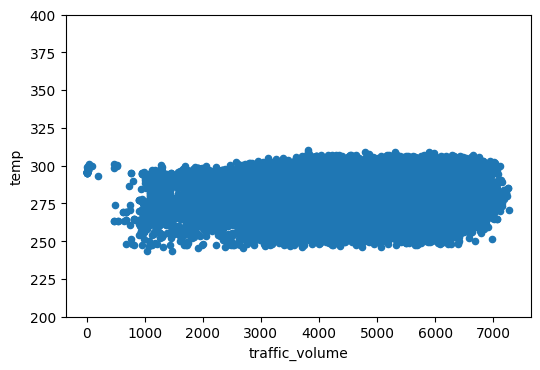

In [15]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 400)

The scatter plot above shows that there doesn't seem to be a large indicator between weather temperature and traffic volume. 

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.


In [16]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

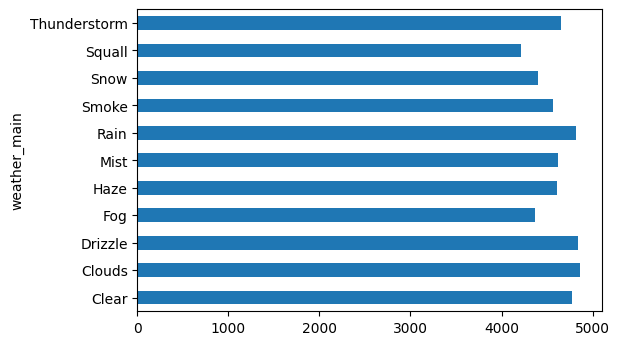

In [19]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()


The horizontal bar graph does not indicate any traffic volume exceeding 5000 cars. Drizzle, clouds, and rain seem to be the weather type that indicates the most traffic volume. 

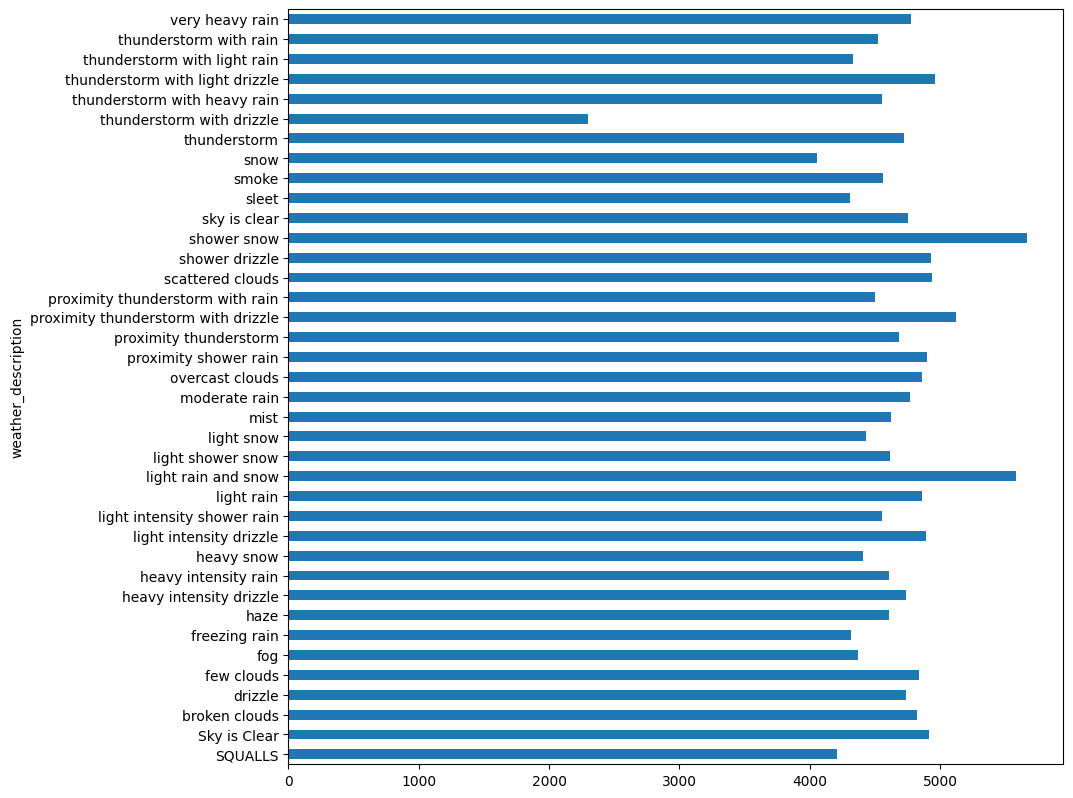

In [31]:

by_weather_description["traffic_volume"].plot.barh(figsize=(10,10))
plt.show()


Analyzing this bar graph there is traffic volume exceeding 5000 cars with 2 different weather types. Shower snow, light rain and snow are two indicators of heavy traffic. 

# Conclusion

The goal of this analysis was to determine indicators of heavy traffic such as weather type, time of the day, time of the week, etc.

Through analyzing the data we learned 
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

